In [1]:
import pickle
from matplotlib import pyplot as plt

from TextRepresenter import PorterStemmer
from Index import Index
from Weighter import *
from IRModel import *
from EvalIRModel import *
from GridSearch import GridSearch

In [2]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()
weighter = WeighterVector(index)
#weighter.calculeNorms()

prepend = '_cacm_w2.pickle'
#prepend = '_cisi_w2.pickle'

In [3]:
qp = QueryParser()
qp.initFile('cacm/cacm.qry', 'cacm/cacm.rel')
qu = qp.nextQuery()

query_text = qu.text_
print(qu.text_, '\n', qu.relevants_[:10])
ps = PorterStemmer()
query = ps.getTextRepresentation(query_text)
eval_irm = EvalIRModel('cacm/cacm.qry', 'cacm/cacm.rel')
#eval_irm = EvalIRModel('cisi/cisi.qry', 'cisi/cisi.rel')

        What articles exist which deal with TSS (Time Sharing System), an operating system for IBM computers? 
 [1410, 1572, 1605, 2020, 2358, 2434, 2863, 3078, 1134, 1613]


# 1. Modèle de langue

In [4]:
language_model = LanguageModel(weighter)

In [5]:
scores, score_absent = language_model.getScores(query, 0.1)

In [7]:
len(scores)

2131

In [22]:
scores[57]

-2.981318497366501

In [40]:
pmd = 1/40
pmc = 451/2607356
print(pmd, pmc)

0.025 0.0001729721603033878


In [15]:
np.log(0.1*pmd + 0.9*pmc)

-5.931056440297023

In [6]:
language_model.getRanking(qu.text_, lambd=0.105)

array([[2371, -64.776524819163],
       [2036, -65.2777016851589],
       [2069, -65.9694639461373],
       ...,
       [1865, -78.1384598384618],
       [1864, -78.1384598384618],
       [1, -78.1384598384618]], dtype=object)

In [9]:
index.getStrDoc(704)

' Combinatorial of M Things Taken One At A Time Two At A Time, Up To N At A Time (Algorithm 161) \n  Collins, D. H. \n  \n '

In [25]:
maxval = -20
maxkey = 0
for key, val in scores.items():
    if val > maxval:
        maxval = val
        maxkey = key
print(maxval, maxkey)

-2.981318497366501 57


In [7]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=1))
results

/home/pierre/documents/upmc/ri/git/IRModel.py:97: RuntimeWarning: divide by zero encountered in log
  scores[d] += tw4q[stem] * np.log((1-lambd)*(tf_t_c/l_c))


{'precision_recall': array([0.44934063, 0.17336105, 0.15811888, 0.15811888, 0.15811888,
        0.15811888, 0.13420323, 0.13206131, 0.13206131, 0.13206131,
        0.13206131, 0.13206131, 0.13206131, 0.13206131, 0.13206131,
        0.13206131, 0.13206131, 0.13206131, 0.13206131, 0.13206131]),
 'precision_recall_std': array([2.20560049e-01, 8.92805928e-03, 2.68874114e-03, 2.68874114e-03,
        2.68874114e-03, 2.68874114e-03, 1.34047229e-03, 3.71796877e-05,
        3.71796877e-05, 3.71796877e-05, 3.71796877e-05, 3.71796877e-05,
        3.71796877e-05, 3.71796877e-05, 3.71796877e-05, 3.71796877e-05,
        3.71796877e-05, 3.71796877e-05, 3.71796877e-05, 3.71796877e-05]),
 'precision_mean': 0.1178959275192939,
 'precision_mean_std': 0.0030351943392854823}

In [83]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=0.01))
results

{'precision_recall': array([0.33335915, 0.22131794, 0.21828406, 0.21448632, 0.20158016,
        0.18840745, 0.17992398, 0.17304323, 0.16895803, 0.16638396,
        0.16169476, 0.15649455, 0.14757655, 0.1420082 , 0.14070677,
        0.14048153, 0.13981543, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.23665181, 0.05738141, 0.05664865, 0.05645964, 0.04528749,
        0.03911002, 0.03495516, 0.03377583, 0.03361843, 0.03254995,
        0.02986675, 0.02521259, 0.01689424, 0.00774926, 0.00682432,
        0.00616851, 0.00555382, 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.1416873292416284,
 'precision_mean_std': 0.024344052965063843}

In [84]:
results = eval_irm.evalModel(language_model, ranking_call = lambda m, text: m.getRanking(text, lambd=0))
results

{'precision_recall': array([0.41790062, 0.23990436, 0.22561612, 0.20763376, 0.18980525,
        0.17996858, 0.17432248, 0.16920732, 0.16590037, 0.16317974,
        0.15937132, 0.15498508, 0.14665155, 0.14164405, 0.14057276,
        0.14032197, 0.13978297, 0.13950089, 0.13950089, 0.13947646]),
 'precision_recall_std': array([0.23494905, 0.07325164, 0.06052598, 0.04712402, 0.03831104,
        0.03383749, 0.03164816, 0.03114483, 0.03076699, 0.02965819,
        0.02755479, 0.02365908, 0.01505251, 0.00706326, 0.00647972,
        0.00580792, 0.00547178, 0.00526003, 0.00526003, 0.00524381]),
 'precision_mean': 0.14813167781132175,
 'precision_mean_std': 0.026599684302734603}

# 2. Modèle BM25

In [ ]:
bm25_model = BM25Model(weighter)

In [ ]:
scores = bm25_model.getScores(query)
print(scores)

In [ ]:
bm25_model.getRanking(query_text)[:10]

In [ ]:
results = eval_irm.evalModel(bm25_model, ranking_call = lambda m, text: m.getRanking(text))
results

# 3. Optimisation des paramètres
## 3.1 Language Model

In [12]:
#lambda_values = np.geomspace(1e-5, 1, 100)
lambda_values = np.linspace(0, 1, 20)

In [13]:
search = GridSearch(param_a_name="lambd", param_a_values=lambda_values)
results = search.search(language_model, train_prop=0.8, seed=42)
lang_results = np.array(results)

/home/pierre/documents/upmc/ri/git/IRModel.py:97: RuntimeWarning: divide by zero encountered in log
  scores[d] += tw4q[stem] * np.log((1-lambd)*(tf_t_c/l_c))


In [14]:
with open('models/lang_results_corrected'+prepend, 'wb') as f:
    pickle.dump(lang_results, f, protocol=4)

In [ ]:
with open('models/lang_results'+prepend, 'rb') as f:
    lang_results = pickle.load(f)

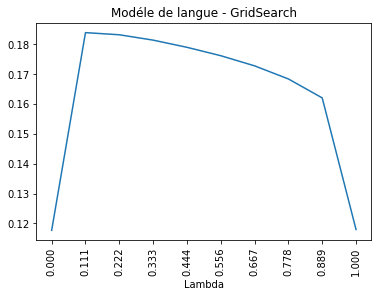

In [11]:
lambda_values = np.linspace(0, 1, 10)
#lambda_values = np.geomspace(1e-5, 1, 50)
plt.title("Modéle de langue - GridSearch")
plt.plot(lambda_values, lang_results[:,1])
plt.xlabel("Lambda")
plt.xticks(lambda_values, rotation='vertical');

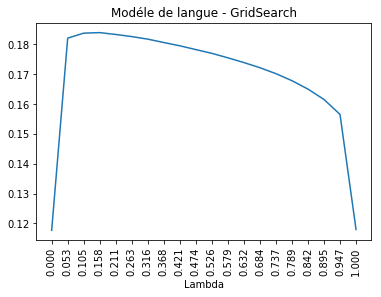

In [15]:
lambda_values = np.linspace(0, 1, 20)
#lambda_values = np.geomspace(1e-5, 1, 50)
plt.title("Modéle de langue - GridSearch")
plt.plot(lambda_values, lang_results[:,1])
plt.xlabel("Lambda")
plt.xticks(lambda_values, rotation='vertical');

## 3.2 BM25 Model

In [ ]:
param_a_values = np.linspace(1, 2, 20)
param_b_values = list(np.linspace(0.5, 1, 20))

In [ ]:
search = GridSearch(param_a_name="k1", param_a_values=param_a_values, param_b_name="b", param_b_values=param_b_values)
results = search.search(bm25_model, train_prop=0.8, seed=42)
bm25_results = np.array(results)
bm25_results

In [ ]:
with open('models/bm25_results'+prepend, 'wb') as f:
    pickle.dump(bm25_results, f, protocol=4)

In [ ]:
with open('models/bm25_results'+prepend, 'rb') as f:
    bm25_results = pickle.load(f)

In [ ]:
bm25_matrix = np.array(bm25_results[:, 1].reshape(20, 20), dtype=np.float)
# k1 : ligne, b : colonnes
idx = np.argmax(bm25_matrix)
print(param_a_values[idx//20], param_b_values[idx%20], np.max(bm25_matrix))

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(bm25_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(len(param_b_values)))
ax.set_yticks(np.arange(len(param_a_values)))
# ... and label them with the respective list entries
ax.set_xticklabels(['{:.2f}'.format(k1v) for k1v in param_b_values])
ax.set_yticklabels(['{:.2f}'.format(k1v) for k1v in param_a_values])

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(param_a_values)):
#    for j in range(len(param_b_values)):
#        text = ax.text(j, i, bm25_matrix[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("bm25 accuracy")
#fmt = StrMethodFormatter('{x}')
#ax.yaxis.set_major_formatter(fmt)

fig.tight_layout()
plt.show()